# Random Forest Model (All Features)
At first, we will run a random forest with all the features of our labeled dataset.

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pipeline as p
from geopandas import GeoDataFrame

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_precision_recall_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
seed = 0
k = 10

In [2]:
df = pd.read_csv(r"C:\Users\Maca\Documents\project_ml\Project-Machine-Learning-CAPP\Data-Cleaning\verified.csv")

In [3]:
df.describe()

,bot,verified,geo_enabled,default_profile,has_description,len_en,followers,friends,listed_count,likes,tweets
count,55721.000000,55721.000000,55721.000000,55721.000000,55721.000000,55721.000000,5.572100e+04,5.572100e+04,55721.000000,55721.000000,5.572100e+04
mean,0.787656,0.057267,0.138314,0.815240,0.484880,0.886650,5.822340e+04,1.295441e+03,180.588844,3437.030635,7.345929e+03
std,0.408970,0.232355,0.345232,0.388106,0.499776,0.317024,1.479855e+06,2.122774e+04,3935.985596,16481.195534,4.182673e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000e+00
25%,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000e+01
50%,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,2.000000e+01,0.000000,0.000000,3.900000e+01
75%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,7.000000e+01,2.330000e+02,0.000000,242.000000,3.840000e+02
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.069380e+08,2.141379e+06,606500.000000,886115.000000,2.766520e+06


In [4]:
#Split
df_train, df_test = p.split(df)

Total data before split: 55721
Train size data: 44576
Test size data: 11145


In [5]:
#Define features and target
labels = df_train.loc[:, df_train.columns != 'bot'].columns.values
train_target = df_train.loc[:, 'bot']
train_features = df_train.loc[:, df_train.columns != 'bot']
test_target = df_test.loc[:, 'bot']
test_features = df_test.loc[:, df_train.columns != 'bot']

## Warning!! Run this part of the code took ~5 hours
start time: 7.57am

In [6]:
# Random Forest 1
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(random_state=seed)

params2 = {'criterion':['entropy', 'gini'], 'max_depth':[1,3,5], 'min_samples_split':[2,5,10], 'n_estimators':[100,1000,5000]}

grid_rf = GridSearchCV(estimator=rf1, param_grid=params2,
                   cv=k, return_train_score=True,
                   scoring = ['accuracy', 'precision', 'recall'],
                   refit='accuracy')

grid_rf.fit(train_features, train_target)
cv_results_rf = pd.DataFrame(grid_rf.cv_results_)

In [7]:
results_rf = cv_results_rf.sort_values(by='rank_test_accuracy', ascending=True)
results_rf = results_rf[['param_criterion','param_max_depth', 
                                'param_min_samples_split', 'param_n_estimators', 
                                'mean_test_accuracy', 'rank_test_accuracy',
                                'mean_test_precision', 'mean_test_recall']]
results_rf.head()

,param_criterion,param_max_depth,param_min_samples_split,param_n_estimators,mean_test_accuracy,rank_test_accuracy,mean_test_precision,mean_test_recall
50,gini,5,5,5000,0.956591,1,0.975779,0.968962
53,gini,5,10,5000,0.956479,2,0.975776,0.968819
47,gini,5,2,5000,0.956456,3,0.975748,0.968819
52,gini,5,10,1000,0.956411,4,0.975583,0.968933
49,gini,5,5,1000,0.956367,5,0.975608,0.968848


In [8]:
bestrf = grid_rf.best_estimator_
bestrf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

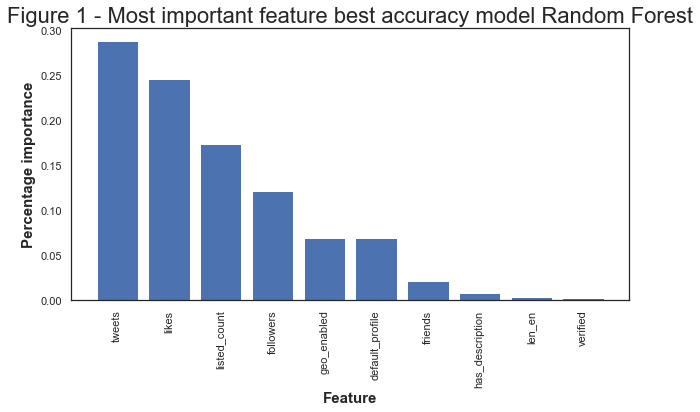

In [10]:
importances_rf = bestrf.feature_importances_

# Sort in descending order
indices_rf = np.argsort(importances_rf)[::-1]

# Sort the labels in a corresponding fashion
names_rf = [labels[i] for i in indices_rf]

# Plot
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("white")
plt.figure()
plt.title('Figure 1 - Most important feature best accuracy model Random Forest', fontsize=22)
plt.ylabel('Percentage importance', fontsize=15, fontweight='bold')
plt.xlabel('Feature', fontsize=15, fontweight='bold')
plt.bar(range(train_features.shape[1]),importances_rf[indices_rf])
plt.xticks(range(train_features.shape[1]), names_rf, rotation=90)
plt.show()

[[2185  189]
 [ 258 8513]]


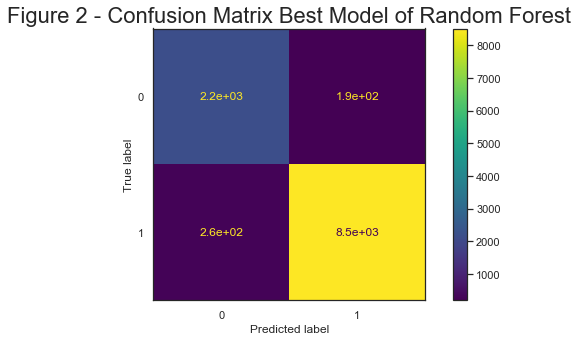

In [11]:
test_pred_rf = bestrf.predict(test_features)
plot_confusion_matrix(bestrf,test_features,test_target)
plt.title('Figure 2 - Confusion Matrix Best Model of Random Forest', fontsize=22)
print(metrics.confusion_matrix(test_target, test_pred_rf))

In [30]:
print("Accuracy:\t{}\nPrecision:\t{}\nRecall:\t\t{}\nF1 Score:\t{}\n".format(metrics.accuracy_score(test_pred_rf, test_pred_rf),
                                                                           metrics.precision_score(test_pred_rf, test_pred_rf),
                                                                           metrics.recall_score(test_pred_rf, test_pred_rf),
                                                                           metrics.f1_score(test_pred_rf, test_pred_rf)
                                                                          ))

Accuracy:	1.0
Precision:	1.0
Recall:		1.0
F1 Score:	1.0



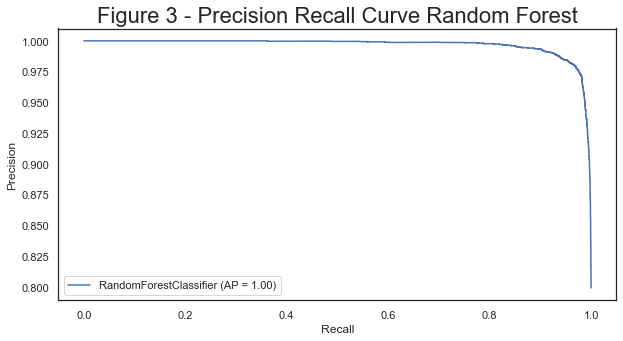

In [12]:
#Complete precision recall curve for random forest
plot_precision_recall_curve(bestrf,test_features,test_target)
plt.title('Figure 3 - Precision Recall Curve Random Forest', fontsize=22)
plt.show()

# Random Forest Model (COVID Features)
This model inclues only the features of the COVID dataset.

## Warning!! Run this part of the code took ~5 hours

In [ ]:
#Define features and target
covid_columns = ['followers', 'friends', 'tweets', 'likes']
labels_rf2 = df_train.loc[:, covid_columns].columns.values
train_features_rf2 = df_train.loc[:, covid_columns]
test_features_rf2 = df_test.loc[:, covid_columns]

In [ ]:
train_features_rf2.columns

In [ ]:
test_features_rf2.columns

In [20]:
# Random Forest 2
rf2 = RandomForestClassifier(random_state=seed)

grid_rf2 = GridSearchCV(estimator=rf2, param_grid=params2,
                   cv=k, return_train_score=True,
                   scoring = ['accuracy', 'precision', 'recall'],
                   refit='accuracy')

grid_rf2.fit(train_features_rf2, train_target)
cv_results_rf2 = pd.DataFrame(grid_rf2.cv_results_)

In [21]:
results_rf2 = cv_results_rf2.sort_values(by='rank_test_accuracy', ascending=True)
results_rf2 = results_rf2[['param_criterion','param_max_depth', 
                                'param_min_samples_split', 'param_n_estimators', 
                                'mean_test_accuracy', 'rank_test_accuracy',
                                'mean_test_precision', 'mean_test_recall']]
results_rf2.head()

,param_criterion,param_max_depth,param_min_samples_split,param_n_estimators,mean_test_accuracy,rank_test_accuracy,mean_test_precision,mean_test_recall
51,gini,5,10,100,0.944521,1,0.971337,0.957856
46,gini,5,2,1000,0.944364,2,0.971087,0.957913
52,gini,5,10,1000,0.944342,3,0.971032,0.957942
53,gini,5,10,5000,0.944342,4,0.971167,0.957799
50,gini,5,5,5000,0.944320,5,0.971058,0.957885


In [22]:
bestrf2 = grid_rf2.best_estimator_
bestrf2

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

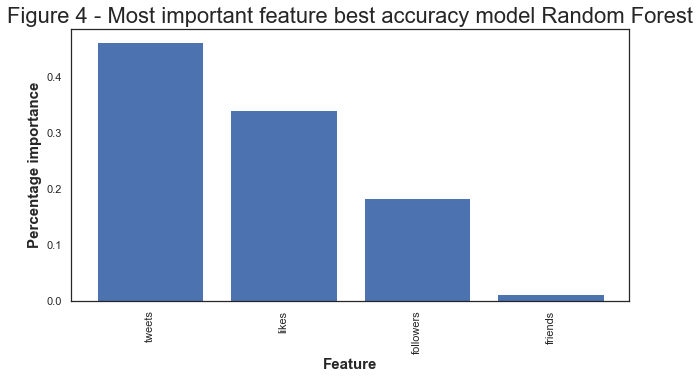

In [24]:
importances_rf2 = bestrf2.feature_importances_

# Sort in descending order
indices_rf2 = np.argsort(importances_rf2)[::-1]

# Sort the labels in a corresponding fashion
names_rf2 = [labels_rf2[i] for i in indices_rf2]

# Plot
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("white")
plt.figure()
plt.title('Figure 4 - Most important feature best accuracy model Random Forest', fontsize=22)
plt.ylabel('Percentage importance', fontsize=15, fontweight='bold')
plt.xlabel('Feature', fontsize=15, fontweight='bold')
plt.bar(range(train_features_rf2.shape[1]),importances_rf2[indices_rf2])
plt.xticks(range(train_features_rf2.shape[1]), names_rf2, rotation=90)
plt.show()

[[2155  219]
 [ 369 8402]]


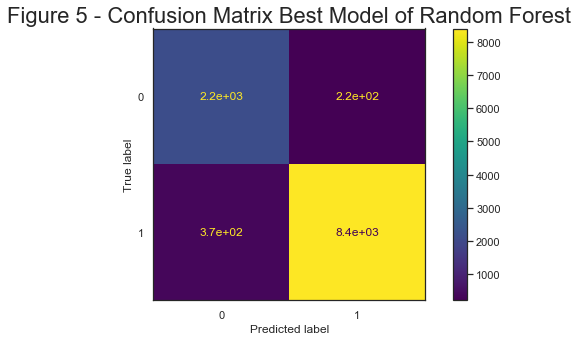

In [25]:
test_pred_rf2 = bestrf2.predict(test_features_rf2)
plot_confusion_matrix(bestrf2,test_features_rf2,test_target)
plt.title('Figure 5 - Confusion Matrix Best Model of Random Forest', fontsize=22)
print(metrics.confusion_matrix(test_target, test_pred_rf2))

In [31]:
print("Accuracy:\t{}\nPrecision:\t{}\nRecall:\t\t{}\nF1 Score:\t{}\n".format(metrics.accuracy_score(test_pred_rf2, test_pred_rf),
                                                                           metrics.precision_score(test_pred_rf2, test_pred_rf),
                                                                           metrics.recall_score(test_pred_rf2, test_pred_rf),
                                                                           metrics.f1_score(test_pred_rf2, test_pred_rf)
                                                                          ))

Accuracy:	0.9758636159712876
Precision:	0.9798896805332108
Recall:		0.9890963925298689
F1 Score:	0.9844715118628413



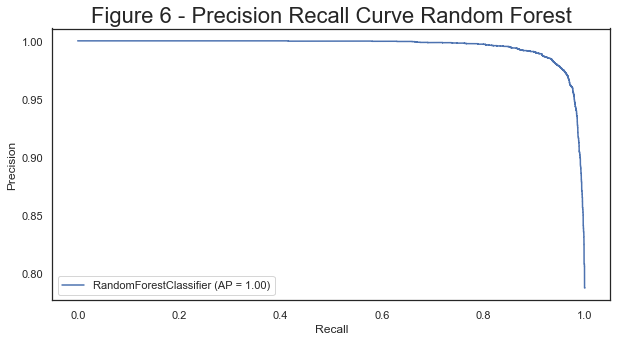

In [29]:
#Complete precision recall curve for random forest
plot_precision_recall_curve(bestrf2,test_features_rf2,test_target)
plt.title('Figure 6 - Precision Recall Curve Random Forest', fontsize=22)
plt.show()

# Covid Dataset
Predict bot accounts posting tweets about COVID.

In [39]:
covid = pd.read_csv(r"C:\Users\Maca\Documents\project_ml\Project-Machine-Learning-CAPP\Data-Cleaning\COVID_tweet.csv")

In [41]:
covid.describe()

,followers,friends,geo_enabled,tweets,likes,verified,has_description
count,1.548900e+04,15489.000000,15489.000000,1.548900e+04,1.548900e+04,15489.000000,15489.000000
mean,2.005959e+04,1890.362515,0.702757,2.242745e+04,1.606211e+04,0.075796,0.927820
std,3.402285e+05,9275.658404,0.457059,6.243016e+04,4.479721e+04,0.264680,0.258794
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.260000e+02,211.000000,0.000000,1.187000e+03,6.410000e+02,0.000000,1.000000
50%,5.270000e+02,599.000000,1.000000,5.144000e+03,3.193000e+03,0.000000,1.000000
75%,2.299000e+03,1600.000000,1.000000,1.844200e+04,1.294300e+04,0.000000,1.000000
max,2.194947e+07,659861.000000,1.000000,2.434684e+06,1.591225e+06,1.000000,1.000000


In [43]:
covid_features = covid.loc[:, covid_columns]

In [46]:
#predict column for COVID
covid['prediction'] = bestrf2.predict(covid_features)
covid.head()

,followers,friends,geo_enabled,tweets,likes,verified,has_description,prediction
0,4955553.0,771.0,1,719761.0,5444.0,1.0,1,1
1,16092.0,1.0,0,7794.0,10.0,0.0,1,0
2,9187.0,983.0,1,97617.0,165.0,1.0,1,1
3,19848.0,2522.0,0,52947.0,19054.0,1.0,1,0
4,12321.0,965.0,1,7580.0,2672.0,0.0,1,0


In [69]:
#plot account predicted
count = covid['prediction'].value_counts().to_frame().transpose()
count = count.rename(columns={0:'Human', 1:'Bot'})
count

,Human,Bot
prediction,13078,2411


Text(0.5, 0, 'Account type')

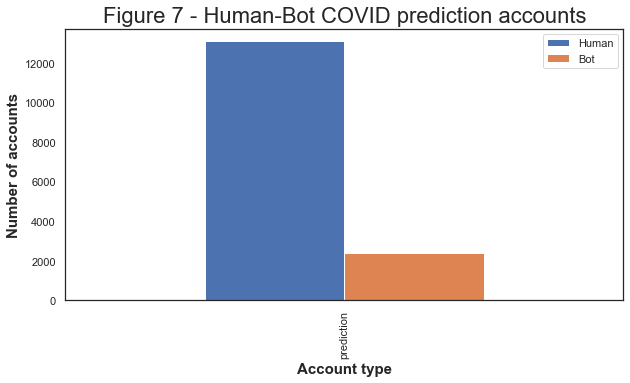

In [72]:
count.plot(y=["Human", "Bot"], kind="bar")
plt.title('Figure 7 - Human-Bot COVID prediction accounts', fontsize=22)
plt.ylabel('Number of accounts', fontsize=15, fontweight='bold')
plt.xlabel('Account type', fontsize=15, fontweight='bold')

In [73]:
covid.to_csv(r'C:\Users\Maca\Documents\project_ml\Project-Machine-Learning-CAPP\Exploring-Features\COVID_prediction.csv', index = False)